COGNIZANT ARTIFICIAL INTELLIGENT JOB SIMULATION TASK 1

 Exploratory Data Analysis

With the rise of remote work, virtual internships prepare individuals for the evolving workplace. I am honoured to share my first virtual internship with the Cognizant Artificial Intelligent with the task to build predictive model on how to better stock perishable products for their client. The project is comprised of 5 tasks to be carried out stage by stage.

Let us start by importing the required libraries

In [1]:
#Imorting Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
%matplotlib inline
warnings.filterwarnings("ignore")
from matplotlib import pyplot

Load CSV Files with Pandas

In [2]:
filepath = 'c:/datasets/sample_sales_data.csv'
data = pd.read_csv(filepath)

In [3]:
data.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


Structure of the dataset

In [4]:
# finding the shape of the Dataset

data.shape

(7829, 10)

In [5]:
# info about Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7829 non-null   int64  
 1   transaction_id  7829 non-null   object 
 2   timestamp       7829 non-null   object 
 3   product_id      7829 non-null   object 
 4   category        7829 non-null   object 
 5   customer_type   7829 non-null   object 
 6   unit_price      7829 non-null   float64
 7   quantity        7829 non-null   int64  
 8   total           7829 non-null   float64
 9   payment_type    7829 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 611.8+ KB


In [6]:
# This is to check for null values
data.isnull().sum()

Unnamed: 0        0
transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

There are a total of 7829 non-null observations in each of the columns. The Dataset contains 10 columns: 2 integers, 6 objects and 2 float.Total memory usage is approximately 611.8+ KB​

In [7]:
# Get the summary statistics of the numerical data
data.describe()

,Unnamed: 0,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000,7829.000000
mean,3914.000000,7.819480,2.501597,19.709905
std,2260.181962,5.388088,1.122722,17.446680
min,0.000000,0.190000,1.000000,0.190000
25%,1957.000000,3.990000,1.000000,6.570000
50%,3914.000000,7.190000,3.000000,14.970000
75%,5871.000000,11.190000,4.000000,28.470000
max,7828.000000,23.990000,4.000000,95.960000


In [8]:
data.columns

Index(['Unnamed: 0', 'transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'],
      dtype='object')

In [9]:
#To check the summary statistics of only the categorical features, we will use 
data.describe(include=object)

,transaction_id,timestamp,product_id,category,customer_type,payment_type
count,7829,7829,7829,7829,7829,7829
unique,7829,7738,300,22,5,4
top,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 19:32:20,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,fruit,non-member,cash
freq,1,2,114,998,1601,2027


. 75% of Customers made purchase to the total of 28.470000 at quantity of          4.000000

. The table also shows that the average Total sales is 19.709905 at quantity of 2.501597

. The min unit_price ranges is between 0.190000 and 23.990000 with the standard   deviation of 5.388088

. The are variations between mean and median across unit_price, quantity and total_price. This variation could represent the customers purchase behaviours.   

. Cash is the payment_type mainly used by 2027 customers across the category.

. Fruit is the most sold product with 998 from 22 catagory.

 .And non-member	customer_type contributed the highest patronage with total numbers of 1601. 

Exploratory Data Analysis:
Using visualization techniques, implement Exploratory Data Analysis (EDA) to investigate the data to find hidden patterns and outliers, often by plotting them in

We can split exploratory data analytics into three parts:

• Univariate analysis

• Bivariate analysis

• Linear relationships

In [14]:
# This shows the number of available character in the variable "Make" 
data['category'].value_counts().shape

(22,)

In [15]:
data['category'].unique()

array(['fruit', 'vegetables', 'refrigerated items', 'frozen',
       'spices and herbs', 'canned foods', 'packaged foods',
       'condiments and sauces', 'beverages', 'dairy', 'cheese', 'meat',
       'seafood', 'baked goods', 'baking', 'snacks', 'baby products',
       'pets', 'personal care', 'medicine', 'kitchen',
       'cleaning products'], dtype=object)

Exploratory Data Analysis (EDA)

Some functions will be defined for easy exploration.

In [16]:
#function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Univariate Data Analysis

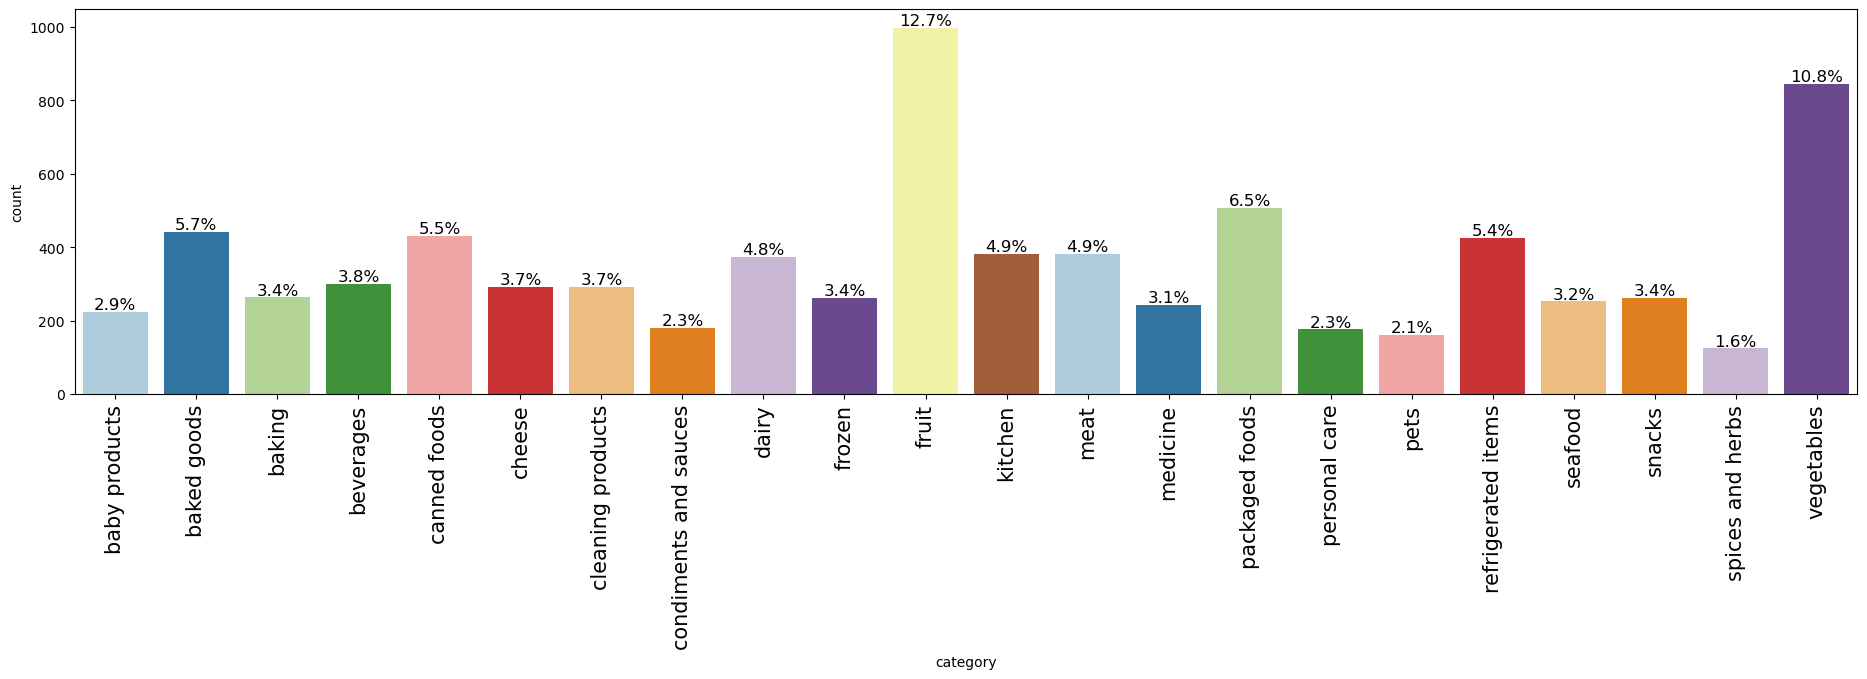

In [18]:
labeled_barplot(data, 'category', perc=True)

Observation:

The Barplot above shows that the Fruit has the highest number of patronage with 12.7% followed by Vegetable with 10.8% while the spices and herbs have the lowest number of patronage.

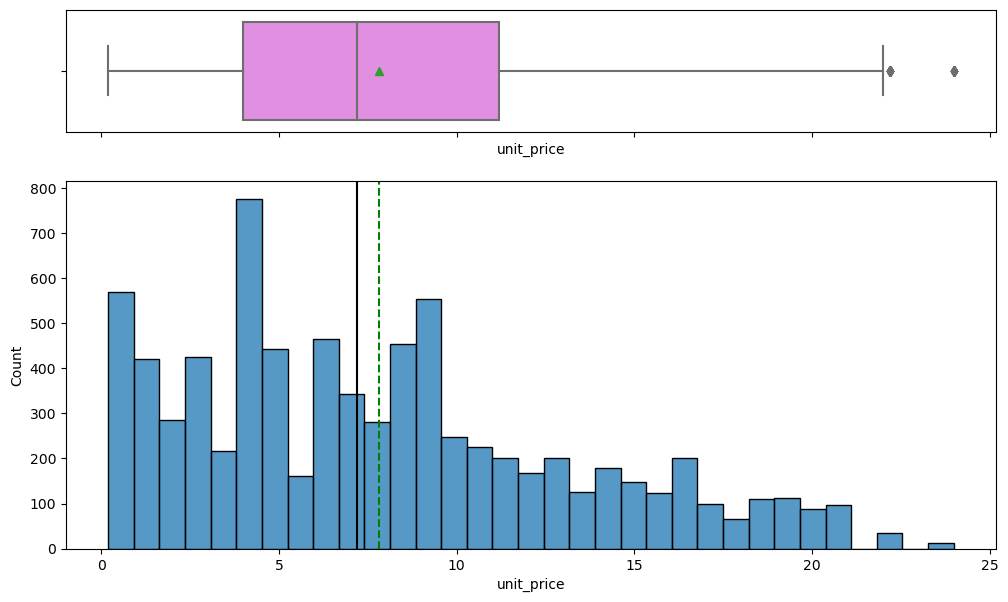

In [19]:
histogram_boxplot(data, 'unit_price')

The average unit_price of a product is slightly greater than the median Count indicating that the distribution for the count of the price is right-skewed. The mode of the distribution indicates that many customers usually purchase products within the unit_price of 4-5 dollars. There are few other customers that appear to have purchased more expensive products within the range of 21- 25 dollars.

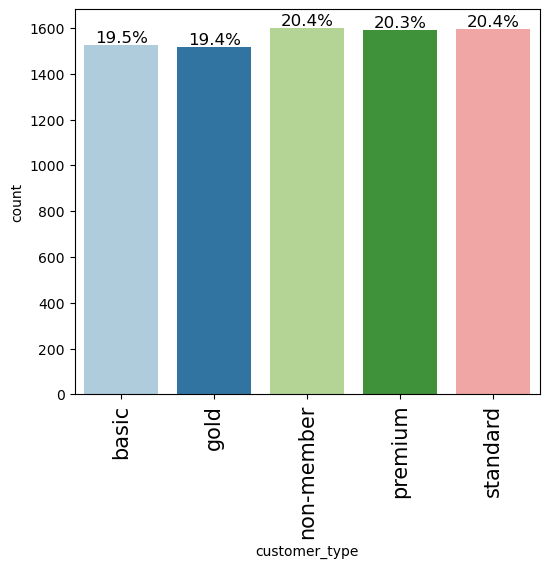

In [20]:
labeled_barplot(data, 'customer_type', perc=True)

Both non-member and standard customer_type contributed the highest patronage at 20.4% each.

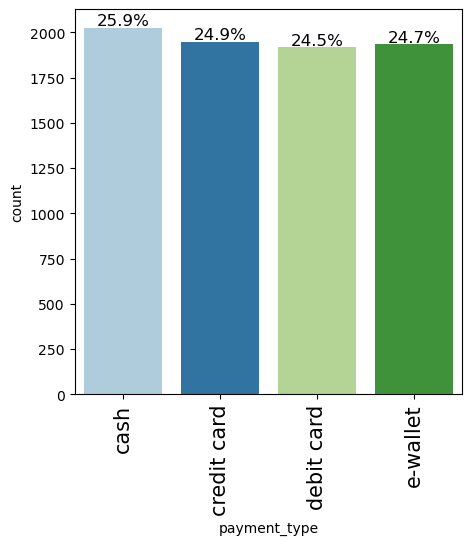

In [21]:
labeled_barplot(data, 'payment_type', perc=True)

Cash is the payment_type mainly used by customers across all catagory. 

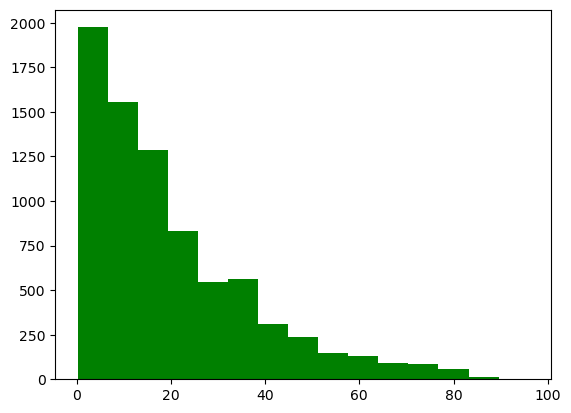

In [24]:
plt.hist(data['total'],bins=15,color="g")
plt.show()

In [25]:
data.corr()   # displays the correlation between every possible pair of attributes as a dataframe

,Unnamed: 0,unit_price,quantity,total
Unnamed: 0,1.000000,0.623392,0.003927,0.483878
unit_price,0.623392,1.000000,0.024588,0.792018
quantity,0.003927,0.024588,1.000000,0.521926
total,0.483878,0.792018,0.521926,1.000000


Displays the correlation between every possible pair of attributes as a dataframe

<AxesSubplot:>

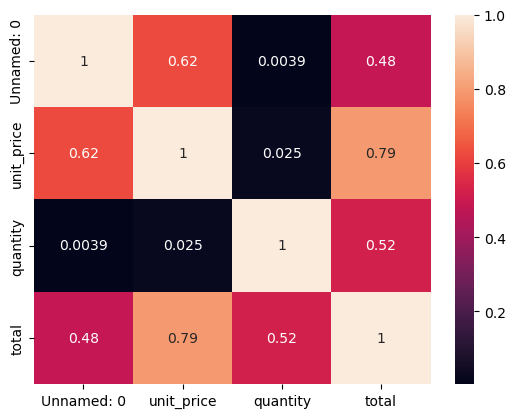

In [26]:
sns.heatmap(data.corr(), annot=True) # plot the correlation coefficients as a heatmap

Observation: No strong correlation among pair of attributes.

Multivariate Data Analysis

Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset

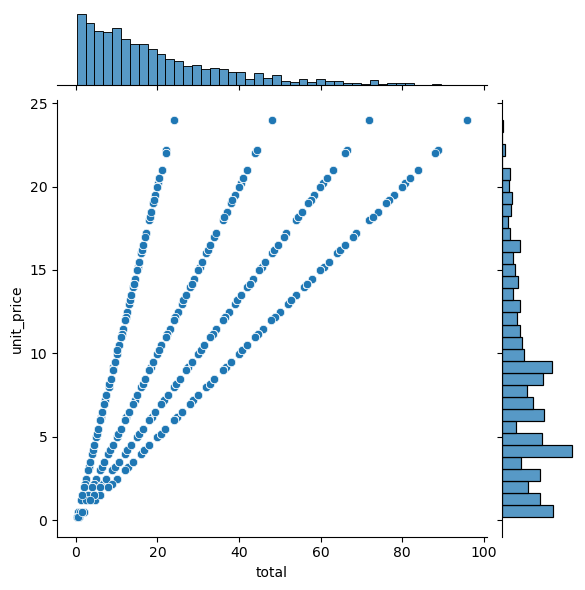

In [29]:
sns.jointplot(x=data['total'], y=data['unit_price']);

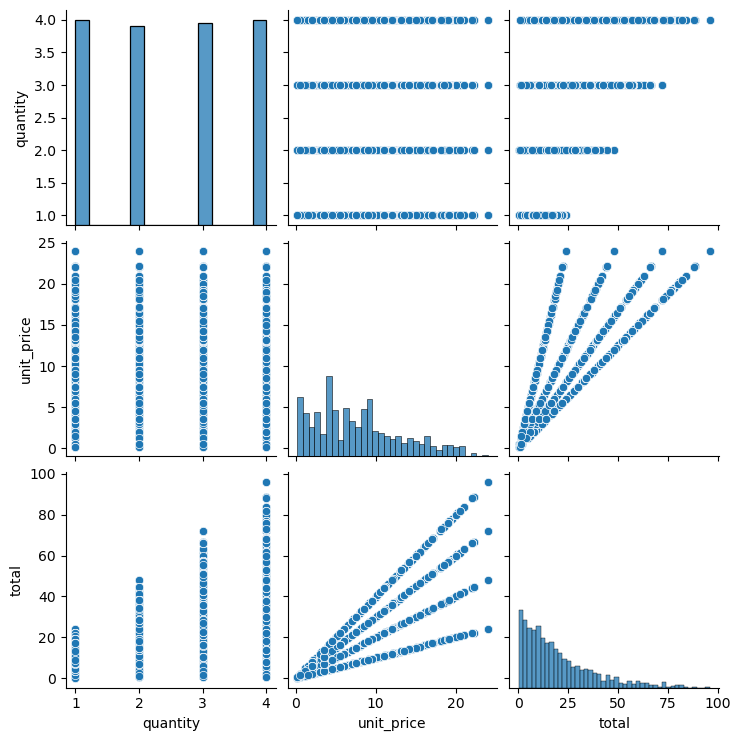

In [30]:
sns.pairplot(data[['quantity','unit_price','total']]);

I received the sample dataset from the Data Engineering team and I’ve been analyzing the sample on behalf of the Data Science team. 

I found the following insights as part of the analysis: 

Fruit & vegetables are the 2 most frequently bought product categories

Non-members are the most frequent buyers within the store

Cash is the most frequently used payment method 

11am is the busiest hour with regards to number of transactions

As a reminder, the client indicated that they wanted to know the following: “How to better stock the items that they sell.” 

With respect to this business question, my recommendations are as follows: 

This is a very broad statement and in order to tackle this with better accuracy, we need to identify a specific problem statement that the business would like to solve. For example, can we predict the demand of products on an hourly basis in order to procure products more intelligently? 

We need more data. 

The current sample only covers 7 days and 1 store.

Based on the problem statement that we move forward with, we will need more datasets to help describe the outcome that we’re trying to model. For example, if we’re modeling demand for products, we may want to include information about stock levels or weather conditions. 